In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [3]:
df = pd.read_csv("data/data.csv")

In [4]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


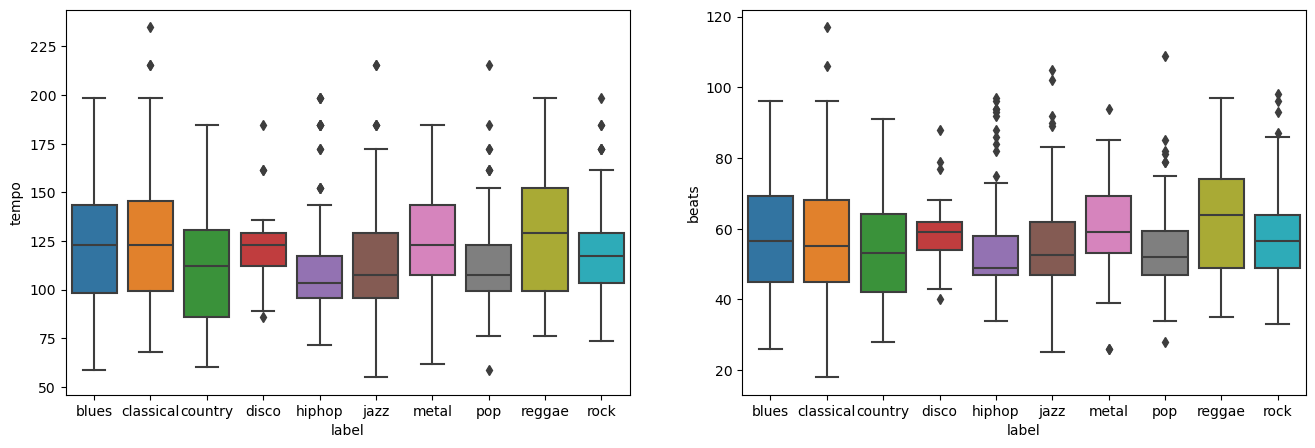

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), ncols=2)
sns.boxplot(y="tempo", x="label", data=df, ax=ax1)
sns.boxplot(y="beats", x="label", data=df, ax=ax2)
plt.show()

In [21]:
X = df.drop(["label", "filename"], axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
ran_forest_model = RandomForestClassifier()
ran_forest_model.fit(X_train, y_train)

RandomForestClassifier()

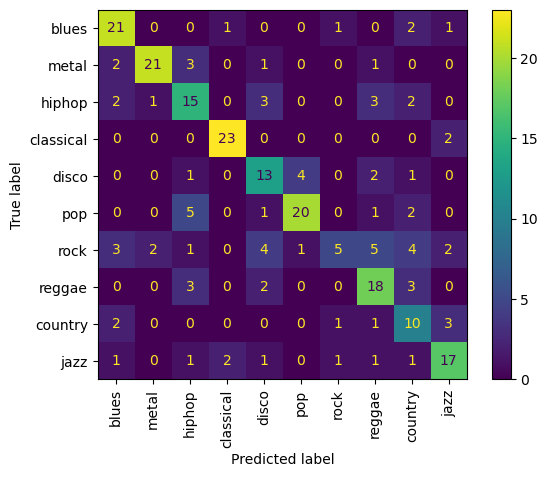

0.652
0.6509046347687322
0.6541776118764439
0.6360502291846


In [41]:
preds = ran_forest_model.predict(X_test)
classes = pd.unique(preds)
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds, labels=classes), display_labels=classes
)
conf_matrix.plot(xticks_rotation=90)
plt.show()

print(accuracy_score(preds, y_test))
print(precision_score(preds, y_test, average="macro"))
print(recall_score(preds, y_test, average="macro"))
print(f1_score(preds, y_test, average="macro"))